# BUMP
Analyse results of barotropic flow over a bump mitgcm simulation

Using [xarray](http://xarray.pydata.org/en/stable/) for quick and easy data access.

In [2]:
# %load /Users/gunnar/Projects/python/standard_imports.py
%matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import xarray as xr
import gsw
import cmocean

# import own modules (install from https://github.com/gunnarvoet/pythonlib))
import gvpy.gvimport as gvi
import gvpy.figure as gvf
import gvpy.misc as gv
import gvpy.ocean as gvo
import spfunctions.spfunctions as spf

# Automatically reload modules. Use this for modules that will be modified while
# editing this notebook.
# Option 1 means only reload modules given in aimport.
# Option 2 means reload all except for those in aimport
# Running %aimport by itself will show what it is doing.
%reload_ext autoreload
%autoreload 1
%aimport spfunctions
%aimport gvpy
%aimport gvpy.misc
%aimport gvpy.ocean
%aimport gvpy.figure
%aimport gvpy.gvimport

import warnings
warnings.filterwarnings('ignore')

## Read model data
Start looking at the non-hydrostatic run B6. Will compare results with hydrostatic B5 later.

In [3]:
# DataDir = '/Volumes/svalbard/mitgcm/bump/B6/run/allmnc/'
DataDir = '/Users/gunnar/Projects/model/bump_data/B6/allmnc/'

# read grid parameters, diagnostics output and state variables
b6 = xr.open_dataset(DataDir+'diag1.glob.nc')
b6s = xr.open_dataset(DataDir+'state.glob.nc')
grid = xr.open_dataset(DataDir+'grid.glob.nc')
# load additional diagnostics
b62 = xr.open_dataset(DataDir+'diag2.glob.nc')
# |PHIBOT  |  1 |       |SM      M1|m^2/s^2         |Bottom Pressure Pot.(p/rho) Anomaly
# |ETAN    |  1 |       |SM      M1|m               |Surface Height Anomaly

In [4]:
b6.coords

Coordinates:
  * Xp1        (Xp1) float64 0.0 5e+03
  * Y          (Y) float64 500.0 1.499e+03 2.496e+03 3.491e+03 4.485e+03 ...
  * X          (X) float64 2.5e+03
  * Yp1        (Yp1) float64 0.0 1e+03 1.998e+03 2.994e+03 3.989e+03 ...
  * T          (T) float64 450.0 1.35e+03 2.25e+03 3.15e+03 4.05e+03 ...
  * Zmd000100  (Zmd000100) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * Zld000100  (Zld000100) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...

In [5]:
b6.data_vars

Data variables:
    diag_levels  (Zmd000100) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 ...
    iter         (T) int32 90 270 450 630 810 990 1170 1350 1530 1710 1890 ...
    UVEL         (T, Zmd000100, Y, Xp1) float64 0.0 0.0 2.598e-08 2.598e-08 ...
    VVEL         (T, Zmd000100, Yp1, X) float64 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
    THETA        (T, Zmd000100, Y, X) float64 3.0 3.0 3.0 3.0 3.0 3.0 3.0 ...
    PHIHYD       (T, Zmd000100, Y, X) float64 0.0 0.0003291 0.0003219 ...
    KLeps        (T, Zld000100, Y, X) float64 0.0 5.866e-26 8.12e-26 ...
    KLdiffKr     (T, Zld000100, Y, X) float64 1e-05 1e-05 1e-05 1e-05 1e-05 ...
    KLviscAr     (T, Zld000100, Y, X) float64 1e-05 1e-05 1e-05 1e-05 1e-05 ...
    WVEL         (T, Zld000100, Y, X) float64 0.0 7.881e-07 7.891e-07 ...
    WV_VEL       (T, Zld000100, Yp1, X) float64 0.0 7.874e-08 1.577e-07 ...
    momKE        (T, Zmd000100, Y, X) float64 0.02 0.02 0.02 0.02 0.02 0.02 ...

In [6]:
b6s.coords

Coordinates:
  * Xp1      (Xp1) float64 0.0 5e+03
  * Y        (Y) float64 500.0 1.499e+03 2.496e+03 3.491e+03 4.485e+03 ...
  * Z        (Z) float64 -31.48 -93.92 -155.3 -215.6 -274.9 -333.2 -390.4 ...
  * X        (X) float64 2.5e+03
  * Yp1      (Yp1) float64 0.0 1e+03 1.998e+03 2.994e+03 3.989e+03 4.981e+03 ...
  * Zl       (Zl) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
  * T        (T) float64 0.0 900.0 1.8e+03 2.7e+03 3.6e+03 4.5e+03 5.4e+03 ...

In [7]:
b6s.data_vars

Data variables:
    iter     (T) int32 0 180 360 540 720 900 1080 1260 1440 1620 1800 1980 ...
    U        (T, Z, Y, Xp1) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    V        (T, Z, Yp1, X) float64 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
    Temp     (T, Z, Y, X) float64 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 ...
    S        (T, Z, Y, X) float64 35.0 35.0 35.0 35.0 35.0 35.0 35.0 35.0 ...
    Eta      (T, Y, X) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    W        (T, Zl, Y, X) float64 0.0 3.449e-08 3.485e-08 3.522e-08 ...
    phi_nh   (T, Z, Y, X) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

In [8]:
grid.coords

Coordinates:
  * Z        (Z) float64 -31.48 -93.92 -155.3 -215.6 -274.9 -333.2 -390.4 ...
  * Zp1      (Zp1) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
  * Zu       (Zu) float64 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 -418.7 ...
  * Zl       (Zl) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
  * X        (X) float64 2.5e+03
  * Y        (Y) float64 500.0 1.499e+03 2.496e+03 3.491e+03 4.485e+03 ...
  * Xp1      (Xp1) float64 0.0 5e+03
  * Yp1      (Yp1) float64 0.0 1e+03 1.998e+03 2.994e+03 3.989e+03 4.981e+03 ...

In [9]:
# center of domain in km
my = grid.Y.mean()/1000
print(my)

<xarray.DataArray 'Y' ()>
array(287.4999999999997)


Look at cell fractions close to the bottom.

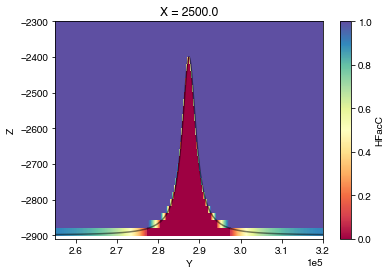

In [10]:
grid.HFacC.plot(cmap='Spectral')
plt.gca().set(xlim=(2.55e5,3.2e5),ylim=(-2910,-2300))
# -grid.Depth.plot(color='k')
plt.plot(grid.Y.values,-grid.Depth.values,color='k',alpha=0.5)

## Plot grid parameters

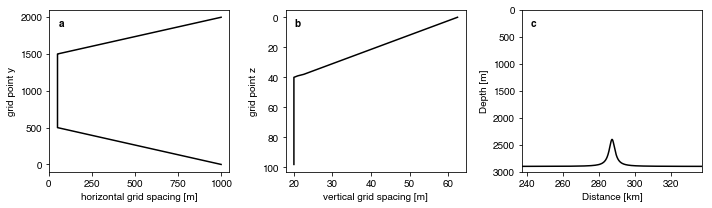

In [11]:
fig, ax = plt.subplots(1,3, figsize=(10,3))
ax = ax.flat
ax[0].plot(np.diff(b6.Y.values), np.arange(0,2000-1),'k')
ax[0].set(xlabel='horizontal grid spacing [m]', ylabel='grid point y')

ax[1].plot(np.diff(-b6s.Z.values), np.arange(0,100-1),'k')
ax[1].set(xlabel='vertical grid spacing [m]', ylabel='grid point z')
ax[1].invert_yaxis()

ax[2].set(ylim=(3000,0), xlim=(my-50,my+50), ylabel='Depth [m]', xlabel='Distance [km]')
# [ax[1].axhline(y=yy, linewidth=0.1, alpha=0.2) for yy in -grid.Z];
# [ax[1].axvline(x=xx, linewidth=0.1, alpha=0.2) for xx in grid.Y/1000];
ax[2].plot(grid.Y/1000,grid.Depth,'k');

for n, axi in enumerate(ax):
    import string
    axi.text(0.05, 0.9, string.ascii_lowercase[n], transform=axi.transAxes, 
            size=10, weight='bold')

plt.tight_layout()
plt.savefig('fig/grid_parameters.png',dpi=300)

The figure shows (a) horizontal grid spacing with higher resolution in the center of the domain, (b) grid spacing in the vertical with higher resolution towards the bottom and (c) the bump in the center of the domain.

## Plot a snapshot of B6
Show only data from the vicinity of the sill.

In [12]:
deltay = 10
yi = np.where((grid.Y/1000>my-deltay) & (grid.Y/1000<my+deltay))
yp1i = np.where((grid.Yp1/1000>my-deltay) & (grid.Yp1/1000<my+deltay))
w = b6.WVEL.isel(Y=yi[0])
v = b6.VVEL.isel(Yp1=yp1i[0])
eps = b6.KLeps.isel(Y=yi[0])
th = b6.THETA.isel(Y=yi[0])

Look at time vector

In [13]:
b6['T']

<xarray.DataArray 'T' (T: 154)>
array([    450.,    1350.,    2250.,    3150.,    4050.,    4950.,
          5850.,    6750.,    7650.,    8550.,    9450.,   10350.,
         11250.,   12150.,   13050.,   13950.,   14850.,   15750.,
         16650.,   17550.,   18450.,   19350.,   20250.,   21150.,
         22050.,   22950.,   23850.,   24750.,   25650.,   26550.,
         27450.,   28350.,   29250.,   30150.,   31050.,   31950.,
         32850.,   33750.,   34650.,   35550.,   36450.,   37350.,
         38250.,   39150.,   40050.,   40950.,   41850.,   42750.,
         43650.,   44550.,   45450.,   46350.,   47250.,   48150.,
         49050.,   49950.,   50850.,   51750.,   52650.,   53550.,
         54450.,   55350.,   56250.,   57150.,   58050.,   58950.,
         59850.,   60750.,   61650.,   62550.,   63450.,   64350.,
         65250.,   66150.,   67050.,   67950.,   68850.,   69750.,
         70650.,   71550.,   72450.,   73350.,   74250.,   75150.,
         76050.,   76950.,   7

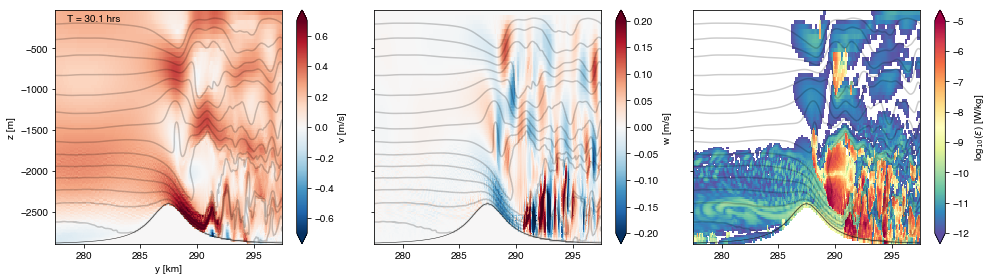

In [14]:
run = 'B6'
ti = 120
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(14,4), sharex=True, sharey=True)

# v
h = ax[0].pcolormesh(v.Yp1.values/1000, grid.Z.values, np.squeeze(v.isel(T=ti).values), cmap='RdBu_r', vmin=-0.7, vmax=0.7)
ax[0].contour(th.Y.values/1000, grid.Z.values, np.squeeze(th.isel(T=ti).values),
            levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewdiths=5)
ax[0].plot(grid.Y.isel(Y=yi[0])/1000, -grid.Depth.isel(Y=yi[0]), color='0.1', linewidth=0.5)
plt.colorbar(h, extend='both', ax=ax[0], label='v [m/s]')
timestr = 'T = {:2.1f} hrs'.format((b6['T'][ti].values)/3600)
ax[0].annotate(timestr, xy=(0.05,0.95), xycoords='axes fraction')
ax[0].set(ylabel='z [m]', xlabel='y [km]', xlim=(my-deltay, my+deltay))

# w
h = ax[1].pcolormesh(w.Y.values/1000, grid.Z.values, np.squeeze(w.isel(T=ti).values), cmap='RdBu_r', vmin=-0.2, vmax=0.2)
ax[1].contour(th.Y.values/1000, grid.Z.values, np.squeeze(th.isel(T=ti).values),
            levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewdiths=5)
ax[1].plot(grid.Y.isel(Y=yi[0])/1000, -grid.Depth.isel(Y=yi[0]), color='0.1', linewidth=0.5)
plt.colorbar(h, extend='both', ax=ax[1], label='w [m/s]')

# epsilon
tmp = np.squeeze(eps.isel(T=ti).values)
tmp2 = np.ma.masked_less(tmp,1e-12,copy=True)
h = ax[2].pcolormesh(eps.Y.values/1000, grid.Z.values, np.log10(tmp2), cmap='Spectral_r', vmin=-12, vmax=-5)
ax[2].contour(th.Y.values/1000, grid.Z.values, np.squeeze(th.isel(T=ti).values),
            levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewdiths=5)
ax[2].plot(grid.Y.isel(Y=yi[0])/1000, -grid.Depth.isel(Y=yi[0]), color='0.1', linewidth=0.5)
plt.colorbar(h, extend='both', ax=ax[2], label='log$_{10}$($\epsilon$) [W/kg]')

plt.tight_layout()
# PrintName = 'movie_{:s}/frame{:04d}.png'.format(run, ti)
PrintName = 'fig/example_non-hydrostatic.png'
plt.savefig(PrintName, dpi=200)

## Read reference profiles

Using a linear equation of state with constant salinity but varying temperature background profile. Read the reference temperature profile tref

In [15]:
fileName = '/Users/gunnar/Projects/model/flow-across-bump/B6/input/Tref'
tref = np.fromfile(fileName)

In [16]:
tref.shape

(100,)

Read PHrefC

In [17]:
fileName = '/Users/gunnar/Projects/model/bump_data/B6/PHrefC.data'
PHrefC = np.fromfile(fileName)

## Density & Buoyancy 
Below are a few snippets from the email list...

[link](http://mitgcm.org/pipermail/mitgcm-support/2006-December/004492.html)<br>
$\rho = \rho_0 (1-t_{\alpha}\cdot(\theta-\theta_{ref}))$

[link](http://forge.csail.mit.edu/pipermail/mitgcm-support/2004-June/002269.html)<br>
Not quite sure, what you mean, but<br>
``rho=rhoNil*(1-tAlpha*(theta(z)-tRef(z)) + sBeta*(salt(z)-sRef(z)))``<br>
``rho=rhoNil - tAlpha*theta*rhoNil + tAlpha*tRef*rhoNil``<br>
is the linear eos. rhoNil is a constant. So if sBeta=0 then<br>
``rhoNil*(1+tAlpha*tRef(z))``<br>
is your reference density.

[link](http://mitgcm.org/pipermail/mitgcm-support/2011-April/007124.html)<br>
What Matt described is what many of us do in idealized setups where we don't care about T & S individually but only about buoyancy in general. Specifically, I use the following options in my data file.<br>
``eosType='LINEAR'``<br>
``tAlpha=2.0E-04``<br>
``sBeta=0.``<br>
``saltStepping = .false.``<br>

Then the buoyancy is defined as<br>
``gravity * tAlpha * THETA``

In [28]:
rho0 = 9.998000000000000e02 # from STDOUT, e.g.: grep -A 1 'rho' STDOUT.0000
gravity = 9.81
talpha = 2.0e-4
# convert reference temperature profile into matrix
trefm = np.tile(tref,(2000,1))
trefm = np.transpose(trefm)

temp = np.squeeze(b6s.Temp.values)
rho = rho0*(1-talpha*(temp-trefm))
rhopert = rho0*talpha*temp
rhoref = rho0*(1+talpha*trefm)

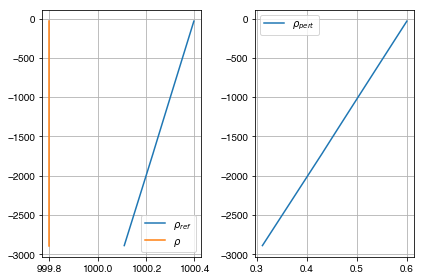

In [29]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(rhoref[:,0],grid.Z,label=r'$\rho_{ref}$')
ax[0].plot(np.squeeze(rho[0,:,0]),grid.Z,label=r'$\rho$')
ax[1].plot(np.squeeze(rhopert[100,:,0]),grid.Z,label=r'$\rho_{pert}$')
for axi in ax:
    axi.legend()
    axi.grid()
plt.tight_layout()

I don't understand why $\rho$ is constant with depth - I guess, more fundamentally, I don't understand how the model works with a reference temperature that is variable in depth.

Anyways, let's make sure whe have N$^2=10^{-6}$<br>
$N^2 = \frac{g}{\rho} \frac{\partial \rho}{\partial z}$<br>
Rough estimate with a change in density of 0.3 kg/m$^3$ over 3000 m.

In [30]:
gravity/rho0*0.3/3000

9.811962392478495e-07

## Pressure

b6.PHIHYD:<br>Hydrostatic Pressure Pot.($p/\rho$) Anomaly<br>units: m$^2$ s$^{-2}$

In [31]:
phi_hyd = b6.PHIHYD

ok, let's have a look at the 'uncalibrated' hydrostatic pressure output. We can see the pressure drop across the ridge!

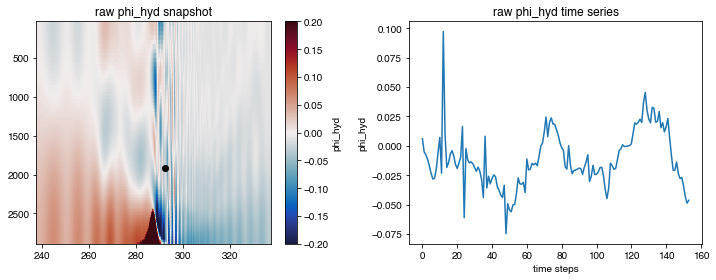

In [32]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
h = ax[0].pcolormesh(grid.Y.values/1000,-grid.Z.values,np.squeeze(phi_hyd.isel(T=100)), vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance)
plt.colorbar(h, ax=ax[0],label='phi_hyd')
ax[0].invert_yaxis()
ax[0].set_title('raw phi_hyd snapshot')
ax[0].set(xlim=(my-50,my+50))
ax[1].plot(np.squeeze(phi_hyd.isel(Zmd000100=50, Y=1100)))
ax[0].plot(grid.Y.values[1100]/1000,-grid.Z.values[50],'ko')
ax[1].set(title='raw phi_hyd time series',xlabel='time steps',ylabel='phi_hyd')
plt.tight_layout()

Look at non-hydrostatic pressure. We need to interpolate hydrostatic and non-hydrostatic pressure to the same time vector.

In [33]:
phi_nh = b6s.phi_nh
# we need to interpolate phi_nh to the time vector of phi_hyd
print(phi_nh.shape)
tmp = np.squeeze(phi_nh)
phi_nh2 = (tmp[1:,:,:].values + tmp[:-1,:,:].values) / 2
print(phi_nh2.shape)

(155, 100, 2000, 1)
(154, 100, 2000)


In [34]:
phi_hyd2 = np.squeeze(phi_hyd.values)
print(phi_hyd2.shape)

(154, 100, 2000)


Plot the 'uncalibrated' non-hydrostatic pressure potential anomaly.

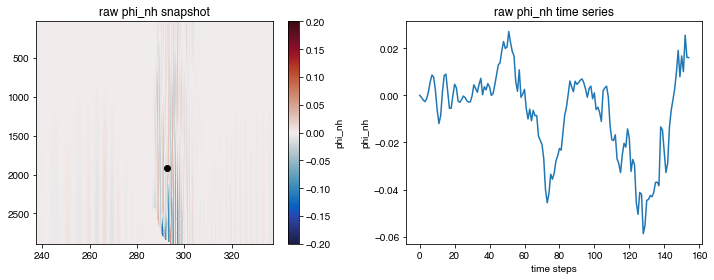

In [35]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
h = ax[0].pcolormesh(grid.Y.values/1000,-grid.Z.values,np.squeeze(phi_nh.isel(T=100)), vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance)
plt.colorbar(h, ax=ax[0],label='phi_nh')
ax[0].invert_yaxis()
ax[0].set_title('raw phi_nh snapshot')
ax[0].set(xlim=(my-50,my+50))
ax[1].plot(np.squeeze(phi_nh[:,50,1100]))
ax[0].plot(grid.Y.values[1100]/1000,-grid.Z.values[50],'ko')
ax[1].set(title='raw phi_nh time series',xlabel='time steps',ylabel='phi_nh')
plt.tight_layout()

now convert phi_hyd and phy_nh to a meaningful pressure

[the pressure P can be obtained as:](http://mitgcm.org/pipermail/mitgcm-support/2013-August/008448.html)

  `` P(i,j,k)/rhoConst = -g*rC(k) + PH(i,j,k) + PNH(i,j,k)``
  
where RC is the coordinate of the cell center with units in m.
  
phi_nh is on Z whereas phi_hyd is on Zmd0001000 - I'm assuming these are the same. They have the same number of depth levels. However, we need to interpolate to the same time steps since the hydrostatic pressure was output in the diagnostic file and the non-hydrostatic in the state file.

To obtain the pressure anomaly, multiply with $\rho_0$:
<br>
$p = phi_{hyd} \cdot \rho_0$.

Let's make sure the units are right:<br>
m$^2\,$s$^{-2} \cdot $kg$\,$m$^{-3} = $kg$\,$m$^{-1}\,$s$^{-2}$ = N$\,$m$^{-2}$ with N=kg$\,$m$\,$s$^{-2}$.

Actually, in a non-hydrostatic run we need to include the non-hydrostatic pressure as well:<br>
$p = (phi_{H}+phi_{NH}) \cdot \rho_0$.

[link](http://mitgcm.org/pipermail/mitgcm-support/2013-November/008636.html)<br>
for the linear equation of state:

``P_k = (PhiHyd*rhoconst + sum(rho0*dc*g))``

where rho0 is rhoconst+rhoRef(k), and rhoRef(k) is set by Tref and Sref.  This doesn't seem consistent with the other equations fo state, but a lot of internal wave folks use linear equation of state, so its something to bear in mind.  However, this term has no physical dynamics either, so, can be dropped.

See the thread "difference between PH and PHL" from Aug 2013.

Cheers,  Jody

[link](http://mitgcm.org/pipermail/mitgcm-support/2013-August/008449.html)<br>
From those output files, the pressure P can be obtained as:<br>
``P(i,j,k)/rhoConst = -g*rC(k) + PH(i,j,k) + PNH(i,j,k)``

Except this isn't quite correct:<br>
``P(i,j,k)/rhoConst = -g*rC(k) + PH(i,j,k) + PNH(i,j,k) + PHref(k)``<br>
where PHref(k) is the hydrostatic pressure due to Tref and Sref.
see calc_phi_hyd.F and find_rho.F.

[link to Jody's gist on pressure in mitgcm](https://gist.github.com/jklymak/156c30b5344a9cf63e8aebc429fee1c6)

In [36]:
rho0 = 9.998000000000000e02 # from STDOUT, e.g.: grep -A 1 'rho' STDOUT.0000
gravity = 9.81
talpha = 2.0e-4

In [37]:
RC = np.tile(grid.RC,(2000,1))
# R coordinate of cell center units: m

Calculate pressure

In [38]:
P = phi_hyd2*rho0 + phi_nh2*rho0 - gravity*np.abs(RC.T)*(rho0+rhoref)
P = P[:,:-1,:]
P.shape

(154, 99, 2000)

Plot pressure (won't see much of the pressure perturbations). Dividing by 10$^6$ should convert from N/m$^2$ to dbar. Not quite sure what is wrong here - probably missing the contribution of Tref.

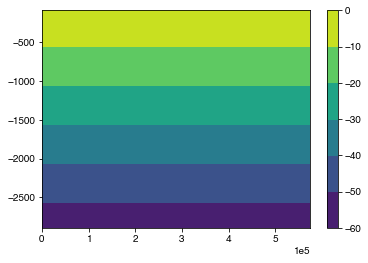

In [39]:
plt.contourf(grid.Y,grid.Z[1:],np.squeeze(P[-1,:,:]/1e6),5)
plt.colorbar()

In [40]:
PP = phi_hyd2*rho0 + phi_nh2*rho0

The pressure field shows barotropic waves propagating back and forth through the domain (see little movie). They should be visible in $\eta$!

In [54]:
import io
import base64
from IPython.display import HTML

video = io.open('pressure_movie/pressure.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

50.0

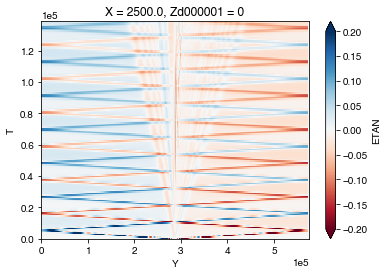

In [60]:
eta = b62.ETAN
eta.plot(vmin=-0.2,vmax=0.2,cmap='RdBu')

The speed of these waves is approximately 1e6 m in 2e4 s (one run through the domain). This corresponds to 50 m/s:

In [61]:
1e6/2e4

50.0

## Internal wave energy flux w$\prime$p$\prime$

Calculate mean pressure for time steps 100-150

In [43]:
meanP = np.mean(P[99:150,:,:],axis=0)

Calculate p'

In [89]:
pp = P[99:150,:,:]-meanP
# using just the anomalies should also give us pressure perturbations?
pp2 = phi_hyd2*rho0 + phi_nh2*rho0

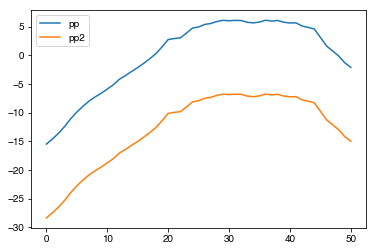

In [161]:
plt.plot(pp[:,50,1000],label='pp')
plt.plot(pp2[99:150,50,1000],label='pp2')
plt.legend()

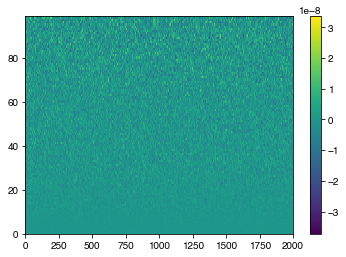

In [165]:
plt.pcolormesh(np.mean(pp,axis=0))
plt.colorbar();


Calculate v', w'

w is defined on the upper/lower grid boundaries, v at the center.

This is the depth vector for w:

``Zl       (Zl) float64 0.0 -62.96 -124.9 -185.7``

In [25]:
V = np.squeeze(b6.VVEL.values)
V = V[:,:-1,:]
W = np.squeeze(b6.WVEL.values)
# interpolate to grid center - for w in the vertical, v in the horizontal
W = (W[:,1:,:]+W[:,:-1,:]) / 2
V = (V[:,:,1:]+V[:,:,:-1]) / 2

In [26]:
W.shape

(154, 99, 2000)

In [27]:
V.shape

(154, 99, 2000)

In [28]:
meanV = np.mean(V[99:150,:,:],axis=0)
meanW = np.mean(W[99:150,:,:],axis=0)

In [29]:
vp = V[99:150,:,:]-meanV
wp = W[99:150,:,:]-meanW

In [30]:
vppp = vp*pp
wppp = wp*pp

Average in time

In [31]:
mwppp = np.mean(wppp,axis=0)

In [32]:
mwppp.shape

(99, 2000)

Average along y

In [33]:
MeanVerticalEnergyFlux = np.mean(mwppp,axis=1)

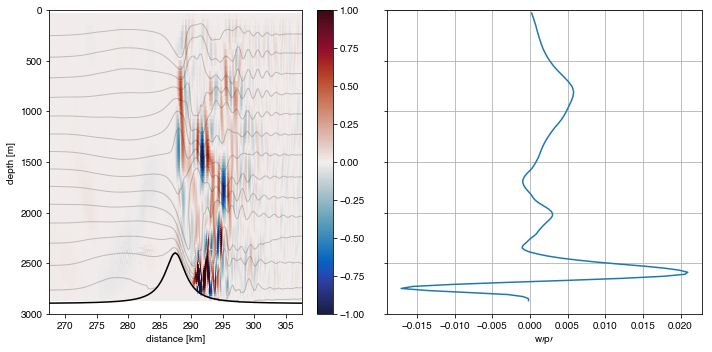

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharey=True)


# calculate mean density for overlay
th = np.squeeze(b6.THETA.values)
mth = np.mean(th[99:150,:,:],axis=0)

h = ax[0].pcolormesh(grid.Y/1000,-grid.Z[:-1],mwppp,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
ax[0].contour(grid.Y/1000,-grid.Z,mth,levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewidths=1)
plt.colorbar(h, ax=ax[0])
ax[0].plot(grid.Y/1000,grid.Depth,'k');
ax[0].set(xlim=(my-20,my+20),ylim=(3000,0),ylabel='depth [m]',xlabel='distance [km]')
# ax[0].invert_yaxis()

ax[1].plot(MeanVerticalEnergyFlux,-grid.Z[:-1])
ax[1].grid(True)
ax[1].set(xlabel='w$\prime$p$\prime$')
plt.tight_layout()
if 1:
    plt.savefig('fig/bump_vertical_energy_flux.png',dpi=300)

In [35]:
print(np.mean(MeanVerticalEnergyFlux))

0.00213601578197


Looks like the mean vertical energy flux is directed upwards.